In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.style.use("ggplot")
pd.set_option("display.max_columns", 100)

In [33]:
df = pd.read_csv("/Users/hibrizi/Project/hotel_booking_user_segmentation/data/user_features_rfm.csv")
print("Loaded:", df.shape)
df.head()

Loaded: (3065, 21)


,customer_id,total_bookings,cancel_rate,mean_lead_time,mean_adr,total_revenue,avg_stay_nights,total_guests,special_requests_mean,booking_changes_mean,used_promo_rate,repeated_rate,previous_cancel_mean,previous_success_mean,deposit_type_mode,customer_type_mode,recency_days,avg_spent_per_booking,freq_per_month,loyalty_index,engagement_score
0,ABW_15.0_Online TA,1,0.000000,45.000000,157.680000,630.7200,4.000000,3.000000,2.000000,0.000000,1.0,0.000000,0.0,0.000000,0,2,440,630.720000,0.068182,0.000000,3.00000
1,ABW_9.0_Online TA,1,0.000000,207.000000,99.000000,297.0000,3.000000,2.000000,1.000000,0.000000,1.0,0.000000,0.0,0.000000,0,2,129,297.000000,0.232558,0.000000,2.00000
2,AGO_128.0_Offline TA/TO,1,0.000000,4.000000,90.430000,1266.0200,14.000000,1.000000,0.000000,2.000000,0.0,0.000000,0.0,0.000000,0,2,229,1266.020000,0.131004,0.000000,2.00000
3,AGO_14.0_Direct,51,0.784314,20.431373,144.245322,72317.5261,9.254902,1.529412,0.078431,0.196078,0.0,0.058824,0.0,0.058824,0,2,78,1417.990708,19.615385,0.065934,0.27451
4,AGO_152.0_Online TA,1,0.000000,0.000000,54.310000,54.3100,1.000000,2.000000,0.000000,1.000000,1.0,0.000000,0.0,0.000000,0,2,655,54.310000,0.045802,0.000000,2.00000


In [34]:
selected_features = [
    "total_bookings", "cancel_rate", "mean_adr", "avg_stay_nights",
    "special_requests_mean", "booking_changes_mean",
    "used_promo_rate", "recency_days", "loyalty_index", "engagement_score"
]

X = df[selected_features].copy()

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

print("Feature matrix shape:", X.shape)

Feature matrix shape: (3065, 10)


In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

k=2: inertia=25635, silhouette=0.250
k=3: inertia=23624, silhouette=0.249
k=4: inertia=21470, silhouette=0.263
k=5: inertia=20036, silhouette=0.182
k=6: inertia=17695, silhouette=0.191
k=7: inertia=16747, silhouette=0.192
k=8: inertia=16413, silhouette=0.187


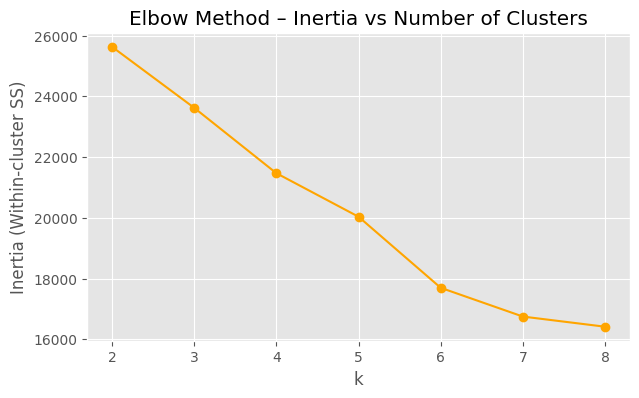

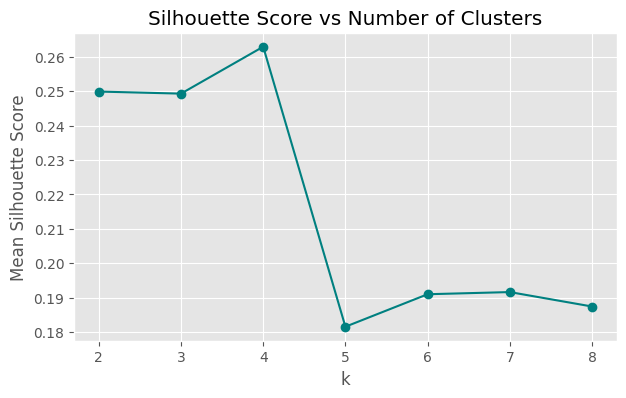

In [36]:
inertia = []
silhouette = []
K_range = range(2, 9)

for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = model.fit_predict(X_scaled)
    inertia.append(model.inertia_)
    sil = silhouette_score(X_scaled, labels)
    silhouette.append(sil)
    print(f"k={k}: inertia={model.inertia_:.0f}, silhouette={sil:.3f}")

# ---- Elbow Method ----
plt.figure(figsize=(7,4))
plt.plot(K_range, inertia, "o-", color="orange")
plt.title("Elbow Method – Inertia vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Inertia (Within-cluster SS)")
plt.show()

# ---- Silhouette Score ----
plt.figure(figsize=(7,4))
plt.plot(K_range, silhouette, "o-", color="teal")
plt.title("Silhouette Score vs Number of Clusters")
plt.xlabel("k")
plt.ylabel("Mean Silhouette Score")
plt.show()

In [37]:
k_opt = 4
print(f"\nOptimal number of clusters (k): {k_opt}")

final_model = KMeans(n_clusters=k_opt, random_state=42, n_init="auto")
df["cluster"] = final_model.fit_predict(X_scaled)


Optimal number of clusters (k): 4


Final Silhouette Score: 0.263

Cluster distribution:
cluster
0     277
1    1722
2     224
3     842
Name: count, dtype: int64


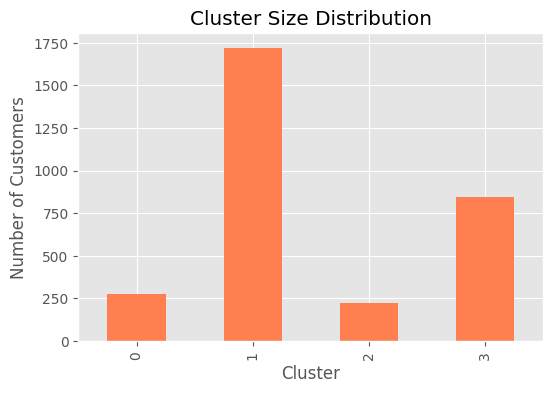

In [38]:
sil_final = silhouette_score(X_scaled, df["cluster"])
print(f"Final Silhouette Score: {sil_final:.3f}")

cluster_counts = df["cluster"].value_counts().sort_index()
print("\nCluster distribution:")
print(cluster_counts)

plt.figure(figsize=(6,4))
cluster_counts.plot(kind="bar", color="coral", title="Cluster Size Distribution")
plt.xlabel("Cluster")
plt.ylabel("Number of Customers")
plt.show()

,total_bookings,cancel_rate,mean_adr,avg_stay_nights,special_requests_mean,booking_changes_mean,used_promo_rate,recency_days,loyalty_index,engagement_score
cluster,,,,,,,,,,
0,19.09,0.83,99.56,4.42,0.23,0.17,0.26,284.65,0.01,0.67
1,12.63,0.02,86.32,3.66,0.25,0.26,0.02,333.44,0.09,0.53
2,5.21,0.02,90.47,4.66,0.55,1.91,0.06,380.93,0.10,2.52
3,70.11,0.10,109.23,3.44,0.77,0.18,0.93,170.54,0.03,1.88


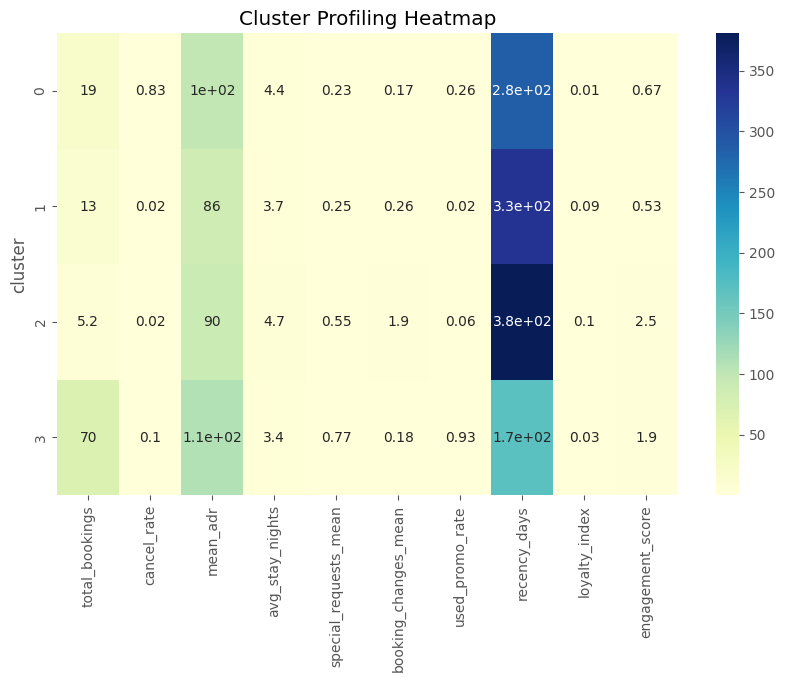

In [39]:
profile = df.groupby("cluster")[selected_features].mean().round(2)
display(profile)

plt.figure(figsize=(10,6))
sns.heatmap(profile, annot=True, cmap="YlGnBu")
plt.title("Cluster Profiling Heatmap")
plt.show()

In [40]:
desc = []
for c in profile.index:
    temp = profile.loc[c]
    if temp["total_bookings"] > profile["total_bookings"].mean() and temp["cancel_rate"] < profile["cancel_rate"].mean():
        desc.append("Loyal / Frequent Traveler")
    elif temp["used_promo_rate"] > profile["used_promo_rate"].mean() and temp["cancel_rate"] >= profile["cancel_rate"].mean():
        desc.append("Promo-driven Saver")
    else:
        desc.append("Occasional / Price-sensitive User")

profile["business_label"] = desc
display(profile)

,total_bookings,cancel_rate,mean_adr,avg_stay_nights,special_requests_mean,booking_changes_mean,used_promo_rate,recency_days,loyalty_index,engagement_score,business_label
cluster,,,,,,,,,,,
0,19.09,0.83,99.56,4.42,0.23,0.17,0.26,284.65,0.01,0.67,Occasional / Price-sensitive User
1,12.63,0.02,86.32,3.66,0.25,0.26,0.02,333.44,0.09,0.53,Occasional / Price-sensitive User
2,5.21,0.02,90.47,4.66,0.55,1.91,0.06,380.93,0.10,2.52,Occasional / Price-sensitive User
3,70.11,0.10,109.23,3.44,0.77,0.18,0.93,170.54,0.03,1.88,Loyal / Frequent Traveler


In [ ]:
output_path = "/Users/hibrizi/Project/hotel_booking_user_segmentation/data/user_features_with_clusters.csv"
df.to_csv(output_path, index=False)
print(f"\nFinal dataset with clusters saved to: {output_path}")


✅ Final dataset with clusters saved to: /Users/hibrizi/Project/hotel_booking_user_segmentation/data/user_features_with_clusters.csv


# Modelling & Clustering (K-Means)

## Objective
Apply the **K-Means** algorithm to group Traveloka customers based on their booking behavior.  
The goal is to discover **natural user segments** with similar patterns (frequency, cancellations, loyalty, promo usage, etc.) that can inform data-driven business strategies.

---

## Modelling Steps
1. **Feature Selection** - choose the 10 behavioral features engineered in Phase 3.  
2. **Scaling** - apply `StandardScaler` so that all features share the same numerical range.  
3. **Elbow Method** - inertia decreases sharply up to **k = 4**, then flattens, forming a clear “elbow”.  
4. **Silhouette Score** - reaches its peak at **k = 4 (≈ 0.263)**, indicating the best cluster separation.  
5. **Train Final Model (k = 4)** - assign a `cluster` label to each customer record.  
6. **Cluster Profiling** - compute feature averages per cluster and visualize them with a heatmap.

---

## Evaluation Results
| Metric | Result | Interpretation |
|---------|---------|----------------|
| **Optimal k** | 4 | Confirmed by both Elbow and Silhouette methods |
| **Final Silhouette Score** | 0.263 | Fair separation between clusters |
| **Cluster 0** | 277 customers (9 %) | Small, high-risk group |
| **Cluster 1** | 1 722 customers (57 %) | Majority / average users |
| **Cluster 2** | 224 customers (7 %) | Small but distinctive group |
| **Cluster 3** | 842 customers (27 %) | High-value loyal segment |

---

## Cluster Profiling (Heatmap Insights)

| Cluster | Business Label | Key Characteristics | Strategic Recommendation |
|:--------|:----------------|:--------------------|:--------------------------|
| **0 – Cancellation-Prone Users** | High cancellation rate (~0.83), long recency (~280 days), low loyalty & engagement | Apply **deposit** or **limited-time booking policies** to reduce cancellations | Encourage reactivation through **time-limited discounts** and **booking commitment programs** |
| **1 – Regular Travelers** | Stable behavior, low cancellation, medium spending, low loyalty | Maintain retention through **seasonal promotions** and **personalized reminders** | Build **loyalty incentives** with **tiered discounts** |
| **2 – Active Planner Users** | Many booking changes & special requests,<br>rarely cancel, highly engaged | Offer **premium features** such as custom itineraries and priority support | Provide **early access deals** and **priority support benefits** |
| **3 – Loyal High-Spenders** | High booking count (~70), high ADR (~110), recent activity (~170 days), low cancellation | Provide **exclusive rewards**, **loyalty tiers**, and **cross-sell hotel + flight bundles** | Focus on **retention**, **VIP membership**, and **cross-sell offers** |

---

## Key Visual Interpretations
- **Elbow Curve** → inertia drops sharply then flattens at **k = 4**, proving that additional clusters give little improvement.  
- **Silhouette Plot** → the highest score (≈ 0.263) occurs at **k = 4**, showing best inter-cluster separation.  
- **Cluster Distribution** → cluster 1 dominates (~57 % of users), while clusters 0 and 2 are small but behaviorally unique.  
- **Heatmap** → cluster 3 shows the highest spending & loyalty; cluster 0 shows frequent cancellations; cluster 2 shows high engagement.

---

## Phase Outcome
- Generated **4 distinct customer segments** with interpretable behavioral profiles.  
- Output file: `data/processed/user_features_with_clusters.csv`  
- Business applications:  
  - **Retain loyal users** (Cluster 3)  
  - **Grow regular users** (Cluster 1 → increase loyalty)  
  - **Re-activate dormant users** (Cluster 0)  
  - **Upsell to active planners** (Cluster 2)

---

## Business Takeaway
The combination of **Elbow and Silhouette** methods validates that **four clusters** best represent customer behavior.  
The heatmap profiling translates these clusters into **actionable business personas**, enabling Traveloka’s team to tailor marketing, rewards, and retention programs for each customer segment.
